This is a quick illustration of the output from the four "flow_downslope" experiments which simulate a dense plug of water flowing down off a raised shelf in an ambiently stratified ocean. The four experiments use different vertical coordianes: a) Layer model, or stacked shallow water, b) Continuous isopycnal coordinates using the ALE-method, c) Terrain-following sigma-coordinates using the ALE-method, and d) Geopotential z*-coordinates using the ALE method.

In [8]:
%pylab inline
import scipy.io.netcdf

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [9]:
# These next two lines add the MOM6-examples/tools/analysis/ directory to the search path for python packages
import sys
sys.path.append('../../tools/analysis/')
# m6toolbox is a python package that has a function that helps visualize vertical sections
import m6toolbox

In [10]:
# Open the output from the four experiments
layer_file = scipy.io.netcdf_file('layer/prog.nc')
rho_file = scipy.io.netcdf_file('rho/prog.nc')
sigma_file = scipy.io.netcdf_file('sigma/prog.nc')
z_file = scipy.io.netcdf_file('z/prog.nc')

In [11]:
# Read the horizontal coordinate which is the same for all configurations 
xq = layer_file.variables['xq'][:] # This is the coordinate of the cell corners (u-points in 1D)
xq = numpy.concatenate(([0],xq)) # Inserts left most edge of domain in to coordinates

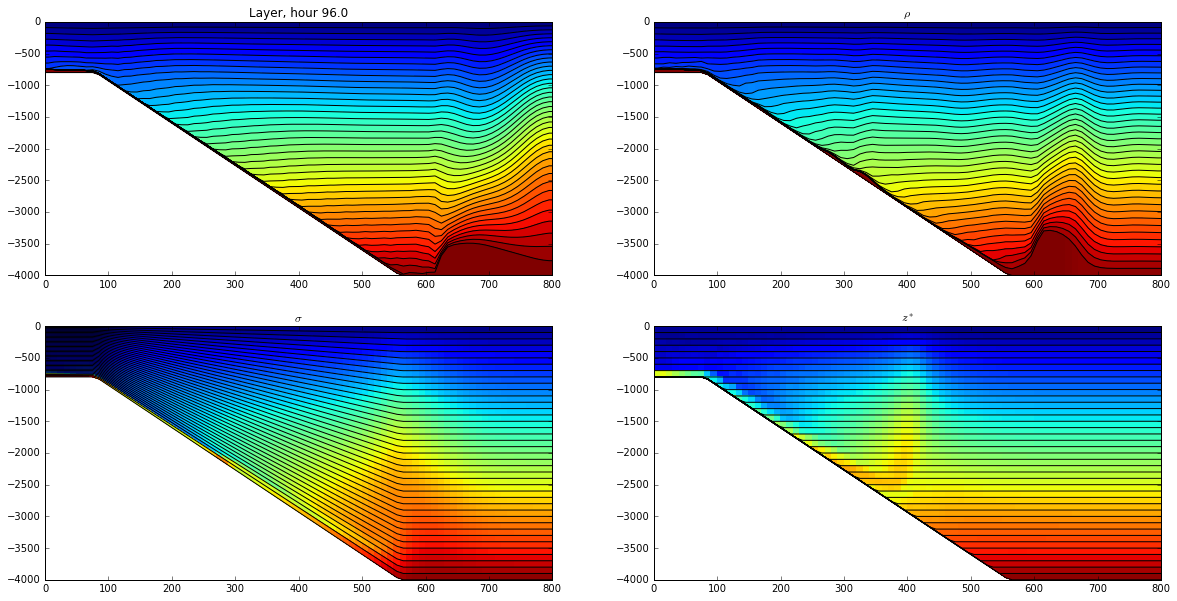

In [28]:
# Define a function to plot a section
def plot_section(file_handle, record, variable='salt', clim=(34.,35.), plot_grid=True, rep='linear'):
    """Plots a section of by reading vertical grid and scalar variable and super-sampling
    both in order to plot vertical and horizontal reconstructions.
    
    Optional arguments have defaults for plotting salinity and overlaying the grid.
    """
    e = file_handle.variables['e'][record,:,0,:] # Vertical grid positions
    s = file_handle.variables[variable][record,:,0,:] # Scalar field to color
    x,z,q = m6toolbox.section2quadmesh(xq, e, s, representation=rep) # This yields three areas at twice the model resolution
    plt.pcolormesh(x, z, q);
    #plt.clim(clim)
    if plot_grid: plt.plot(x, z.T, 'k', hold=True);
    plt.ylim(-4000,1)
    #plt.xlim(400,600)

record = -1 # Last record
plt.figure(figsize=(20,10))
time = layer_file.variables['Time']
for record in range(96):
    plt.clf()
    plt.subplot(2,2,1); plot_section(layer_file, record); plt.title('Layer, hour {}'.format(time[record]*24));
    plt.subplot(2,2,2); plot_section(rho_file, record); plt.title(r'$\rho$');
    plt.subplot(2,2,3); plot_section(sigma_file, record, plot_grid=True); plt.title(r'$\sigma$');
    plt.subplot(2,2,4); plot_section(z_file, record); plt.title(r'$z^*$');
    plt.savefig('frame{:03d}'.format(record))